**SETUP AND LOAD CLEAN DATA**

**mount drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#import library
import pandas as pd

In [3]:
# Load your cleaned Phase 1 dataset
df = pd.read_csv('/content/drive/My Drive/Project data set/completed task/cleaned_linkedin_jobs.csv')

In [4]:
#check columns
df.head(2)

,job_id,company_name,title,max_salary,pay_period,location,company_id,views,med_salary,min_salary,...,salary_id,name,company_size,state,country,city,address,url,skill_abr,skill_name
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,17.0,...,18531.0,Corcoran Sawyer Smith,2.0,NJ,US,Jersey City,242 Tenth Street,https://www.linkedin.com/company/corcoran-sawy...,MRKT,Marketing
1,921716,Corcoran Sawyer Smith,Marketing Coordinator,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,17.0,...,18531.0,Corcoran Sawyer Smith,2.0,NJ,US,Jersey City,242 Tenth Street,https://www.linkedin.com/company/corcoran-sawy...,SALE,Sales


In [5]:
#view all columns by transpose
df.describe(include= "all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
job_id,207531.0,NaN,NaN,NaN,3896567388.836555,82970449.123986,921716.0,3894869457.0,3902322128.0,3904713527.5,3906267224.0
company_name,204705,24428,The Job Network,1469,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,206863,69431,Sales Manager,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max_salary,50764.0,NaN,NaN,NaN,96526.457333,758480.95656,1.0,51.0,85000.0,143100.0,120000000.0
pay_period,61100,5,YEARLY,36355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,207531,8526,United States,13788,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_id,204709.0,NaN,NaN,NaN,12285331.78382,25881513.460011,1009.0,13542.0,217338.0,7801046.0,103472979.0
views,204630.0,NaN,NaN,NaN,14.828857,84.973351,1.0,3.0,4.0,8.0,9975.0
med_salary,10336.0,NaN,NaN,NaN,20976.830088,48922.223238,0.0,18.45,25.0,2236.5,750000.0
min_salary,50764.0,NaN,NaN,NaN,67776.09446,536643.666568,1.0,40.0,65000.0,100000.0,85000000.0


**TOP JOB TITLES BY AVERAGE SALARY**

In [6]:
top_titles = df.groupby('title')['normalized_salary'].mean().sort_values(ascending=False).head(10).reset_index()
print('top 10 job titles(average salary):\n', top_titles)

top 10 job titles(average salary):
                                                title  normalized_salary
0                    Intellectual Property Associate       5.356000e+08
1                 Case Manager RN, Pedi Rheumatology       3.624088e+08
2  Manager Clinical Applications Support Ancillar...       2.304234e+08
3                             Cloud Domain Architect       1.907125e+08
4                Trial Paralegal Hybrid in OC or LA!       1.872000e+08
5                                 Billing Supervisor       1.733608e+08
6                                     DCS Technician       1.560000e+08
7                               Sharepoint Developer       1.525697e+08
8  Full Time Field Service Technician Anaheim/Pom...       1.352000e+08
9              Technical Assistant Employee Benefits       1.071200e+08


**TOP COMPANIES BY NUMBER OF POSTING**

In [7]:
top_companies = df["company_name"].value_counts().head(10).reset_index()
print('top 10 most active company\n\n',top_companies)

top 10 most active company

                                      company_name  count
0                                 The Job Network   1469
1                                         J. Galt   1208
2  Liberty Healthcare and Rehabilitation Services   1114
3                          Lowe's Companies, Inc.   1056
4                     Millennium Recruiting, Inc.    946
5                                          Amazon    898
6                                     Capital One    880
7                           Cogent Communications    855
8                                  Ingersoll Rand    845
9                                  DataAnnotation    789


**REMOTE VS ONSITE BREAKDOWN**

In [8]:
# Check remote vs. on-site
df['remote_allowed'].value_counts(normalize=True).rename({True: 'Remote', False: 'On-site'})

,proportion
remote_allowed,
Remote,1.0


In [9]:
df['remote_allowed'].value_counts(dropna=False)

,count
remote_allowed,
NaN,180754
1.0,26777


In [10]:
df['remote_allowed'].unique()

array([nan,  1.])

In [11]:
df[['title', 'remote_allowed']].sample(3)

,title,remote_allowed
150313,Credit Admin Business Risk & Controls Manager,1.0
20473,Program Manager EPMO Data Science Defense Busi...,NaN
85873,"Senior Director, Residential Clinical Services",NaN


In [12]:
# add a New Column & analyze
df['remote_status'] = df['remote_allowed'].apply(lambda x: 'Remote' if x == 1 else 'Not Remote')

In [13]:
remote_breakdown = df['remote_status'].value_counts(normalize=True) * 100

for status, percentage in remote_breakdown.items():
    print(f"{status}: {percentage:.2f}% of job postings")

Not Remote: 87.10% of job postings
Remote: 12.90% of job postings


**SALARY BY LOCATION**

In [14]:
salary_by_location = df.groupby("location")["normalized_salary"].mean().sort_values(ascending=False).head(10).reset_index()
print("Top Locations by Average Salary:\n", salary_by_location)

Top Locations by Average Salary:
                                   location  normalized_salary
0  Springfield, Illinois Metropolitan Area       1.525448e+08
1                             Westwood, CA       1.300327e+08
2                         Williamstown, KY       5.336652e+07
3                                Nyack, NY       4.789500e+07
4                           Charleston, SC       1.256184e+07
5                           Wilmington, NC       9.065638e+06
6                             Lakeland, FL       8.602881e+06
7                          Bloomington, MN       7.886031e+06
8                            Riverside, CA       6.256136e+06
9                            Roseville, CA       6.110583e+06


**FULL TIME VS INTERSHIP BY INDUSTRY**

In [15]:
# Load supporting files
company_industries = pd.read_csv('/content/drive/My Drive/Project data set/company_industries.csv')
industries = pd.read_csv('/content/drive/My Drive/Project data set/industries.csv')

In [16]:
#view files
company_industries.head(2)

,company_id,industry
0,391906,Book and Periodical Publishing
1,22292832,Construction


In [17]:
#view files
industries.head(2)

,industry_id,industry_name
0,1,Defense and Space Manufacturing
1,3,Computer Hardware Manufacturing


In [18]:
df = df.merge(company_industries, how = "left", on= "company_id")

In [19]:
df.head(2)

,job_id,company_name,title,max_salary,pay_period,location,company_id,views,med_salary,min_salary,...,company_size,state,country,city,address,url,skill_abr,skill_name,remote_status,industry
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,17.0,...,2.0,NJ,US,Jersey City,242 Tenth Street,https://www.linkedin.com/company/corcoran-sawy...,MRKT,Marketing,Not Remote,Real Estate
1,921716,Corcoran Sawyer Smith,Marketing Coordinator,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,17.0,...,2.0,NJ,US,Jersey City,242 Tenth Street,https://www.linkedin.com/company/corcoran-sawy...,SALE,Sales,Not Remote,Real Estate


In [20]:
#Analyze formatted_work_type (internship, full-time) by industry
intern_full = df[['industry', 'formatted_work_type']].dropna(subset=['industry'])
intern_full.head()

,industry,formatted_work_type
0,Real Estate,Full-time
1,Real Estate,Full-time
3,Restaurants,Full-time
4,Restaurants,Full-time
5,Law Practice,Full-time


In [21]:
internship_split = intern_full.groupby(['industry', 'formatted_work_type']).size().unstack().fillna(0)
internship_split.head(10).reset_index()

formatted_work_type,industry,Contract,Full-time,Internship,Other,Part-time,Temporary,Volunteer
0,Accounting,7.0,830.0,38.0,0.0,22.0,2.0,0.0
1,Administration of Justice,0.0,14.0,0.0,0.0,0.0,0.0,0.0
2,Advertising Services,89.0,2427.0,65.0,6.0,110.0,17.0,0.0
3,Airlines and Aviation,4.0,373.0,14.0,0.0,25.0,10.0,2.0
4,Alternative Dispute Resolution,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,Alternative Medicine,6.0,60.0,1.0,0.0,16.0,0.0,2.0
6,Animation and Post-production,0.0,4.0,0.0,0.0,0.0,0.0,0.0
7,"Appliances, Electrical, and Electronics Manufa...",6.0,1133.0,14.0,0.0,8.0,4.0,0.0
8,Architecture and Planning,12.0,363.0,4.0,0.0,4.0,0.0,0.0
9,Armed Forces,3.0,103.0,0.0,0.0,81.0,0.0,0.0


**Word Cloud of Skills**

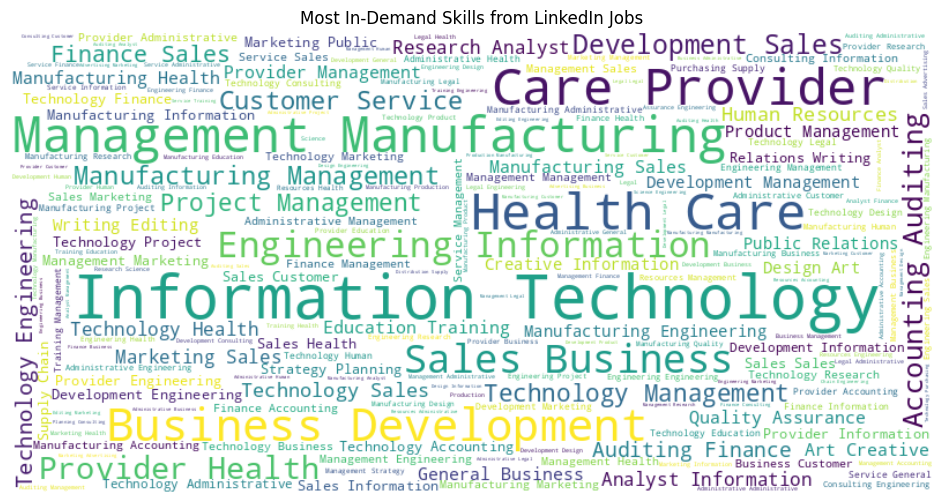

In [22]:
# Step 1: Install wordcloud if not already
!pip install wordcloud

# Step 2: Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 3: Join all skill names into one string
all_skills = ' '.join(df['skill_name'].dropna().astype(str))

# Step 4: Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_skills)

# Step 5: Display it
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most In-Demand Skills from LinkedIn Jobs')
plt.show()

**Top 10 Job Titles by Frequency**

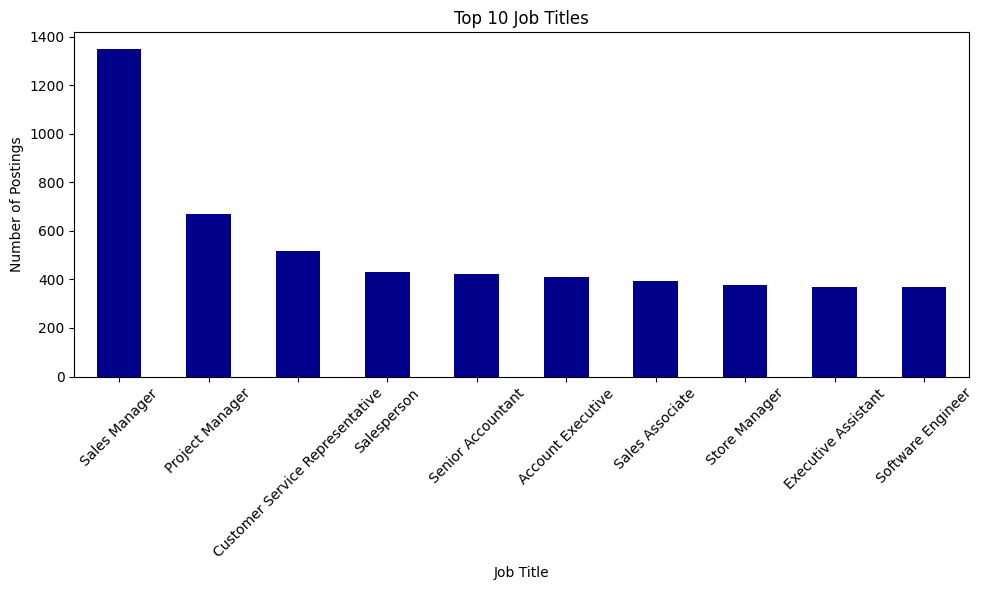

In [32]:
# Count job titles and plot top 10
top_titles = df['title'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_titles.plot(kind='bar', color='darkblue')
plt.title('Top 10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Top 10 Cities by Job Postings**

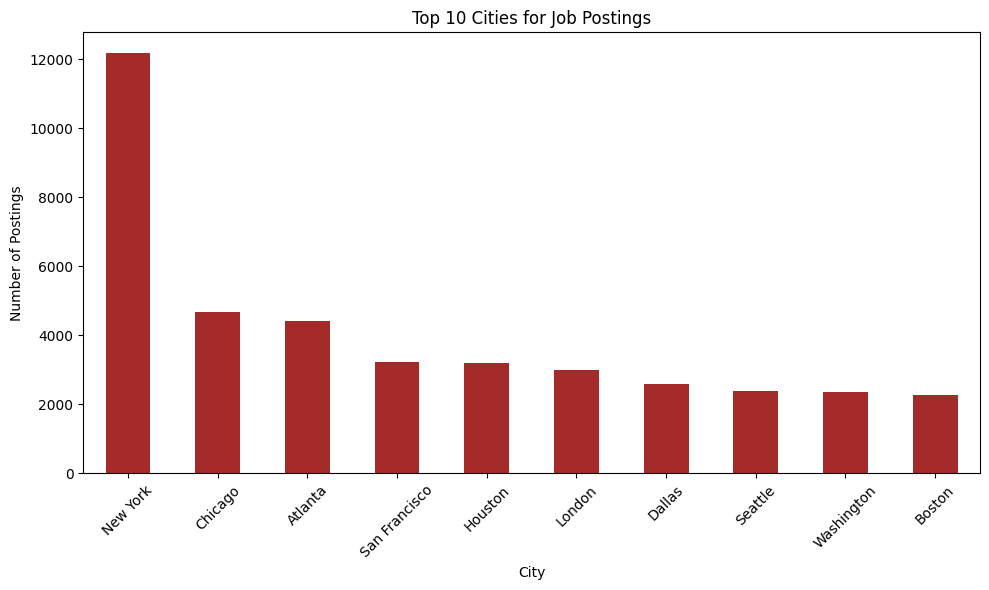

In [46]:
# Remove rows where city is "0" or empty/null
df_cleaned = df[~df['city'].isin(['0', '', None])]

# Count job postings per city
top_cities = df_cleaned['city'].value_counts().head(10).dropna()

plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='brown')
plt.title('Top 10 Cities for Job Postings')
plt.xlabel('City')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Top 10 Job Titles by Average Salary**

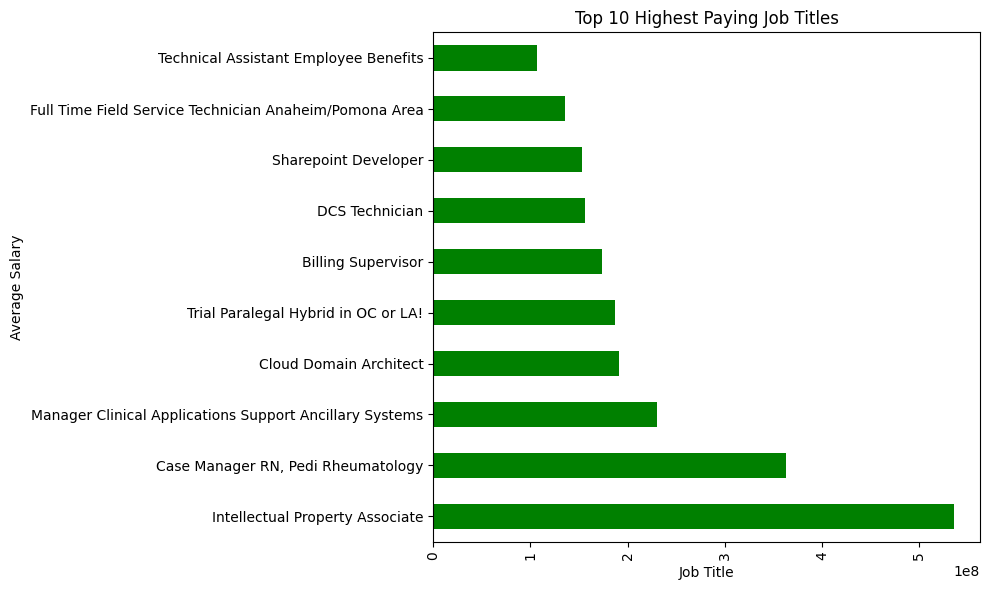

In [39]:
# Calculate average salary per job title
avg_salary_title = df.groupby('title')['normalized_salary'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
avg_salary_title.plot(kind='barh', color='green')
plt.title('Top 10 Highest Paying Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()